# 1. 데이터 불러오기

In [ ]:
import pandas as pd

rating_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/ratings.dat'
rating_df = pd.read_csv(rating_url, names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', engine ='python')
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movie_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/movies.dat'
movie_df = pd.read_csv(movie_url, names=['movie_id', 'title', 'genre'], delimiter='::', engine ='python', encoding='ISO-8859-1')
movie_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
user_url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/users.dat'
user_df = pd.read_csv(user_url, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', engine ='python')
user_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


# 2. EDA & 전처리

## a. 추천 서비스 관련 기초 정보 탐색

<Axes: >

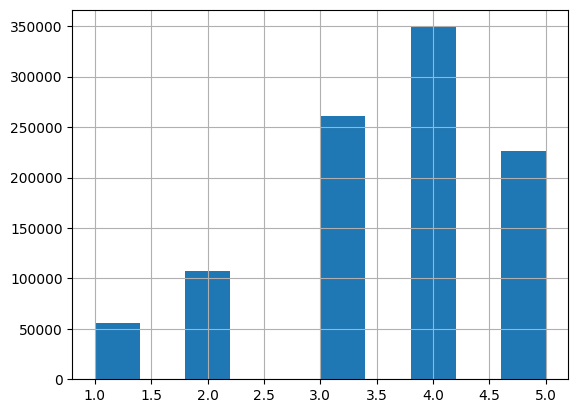

In [ ]:
rating_df['rating'].hist()

<Axes: >

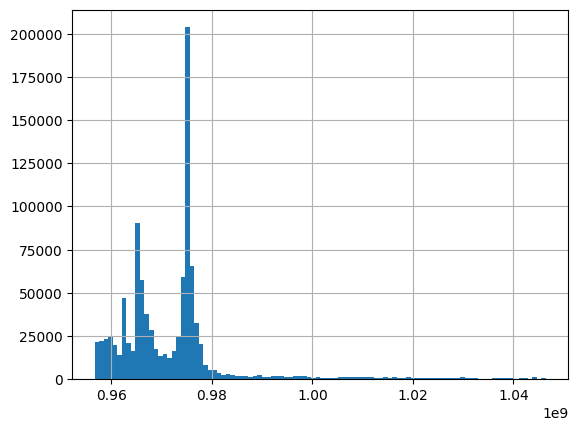

In [ ]:
rating_df['time'].hist(bins=100)

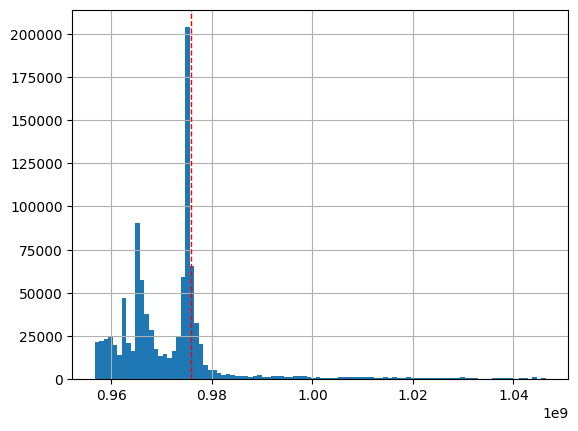

In [ ]:
# 80% 해당하는 구간을 표기

ax = rating_df['time'].hist(bins=100)
split_bound = rating_df['time'].quantile(q=0.8)
ax.axvline(x = split_bound, color='r', linestyle='--', linewidth=1)

In [ ]:
print('점수 데이터의 유저 수:',len(rating_df['user_id'].unique()),'\t 유저 데이터의 유저 수:',len(user_df['user_id'].unique()))
print('점수 데이터의 영화 수:',len(rating_df['movie_id'].unique()),'\t 영화 데이터의 영화 수:',len(movie_df['movie_id'].unique()))

점수 데이터의 유저 수: 6040 	 유저 데이터의 유저 수: 6040
점수 데이터의 영화 수: 3706 	 영화 데이터의 영화 수: 3883


* 평가 없는 영화 177편

## b. 메타 데이터 탐색 - Movie

### 장르

In [ ]:
movie_df['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

In [ ]:
from collections import Counter

count_result = Counter(sum(list(map(lambda x: x.split('|'), movie_df['genre'])), []))
count_result

Counter({'Animation': 105,
         "Children's": 251,
         'Comedy': 1200,
         'Adventure': 283,
         'Fantasy': 68,
         'Romance': 471,
         'Drama': 1603,
         'Action': 503,
         'Crime': 211,
         'Thriller': 492,
         'Horror': 343,
         'Sci-Fi': 276,
         'Documentary': 127,
         'War': 143,
         'Musical': 114,
         'Mystery': 106,
         'Film-Noir': 44,
         'Western': 68})

### 타이틀

In [ ]:
movie_df['title'].head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [ ]:
# 개봉년도 살펴보기
movie_df['title'].apply(lambda x: x[-5:-1]).value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: title, Length: 81, dtype: int64

In [ ]:
movie_df['release_year'] = movie_df['title'].apply(lambda x: x[-5:-2])

In [ ]:
movie_df.head()

,movie_id,title,genre,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,199
1,2,Jumanji (1995),Adventure|Children's|Fantasy,199
2,3,Grumpier Old Men (1995),Comedy|Romance,199
3,4,Waiting to Exhale (1995),Comedy|Drama,199
4,5,Father of the Bride Part II (1995),Comedy,199


## c. 메타 데이터 탐색 - User

In [ ]:
user_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### 성별

In [ ]:
user_df['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

### 나이

In [ ]:
user_df['age'].value_counts() # 균열하지 않음 -> 구간화하기

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [ ]:
def get_age_category(age):
  if age == 1:
    return "False"
  elif 10 <= age < 20:
    return "10"
  elif 20 <= age < 30:
    return "20"
  elif 30 <= age < 40:
    return "30"
  elif 40 <= age < 50:
    return "40"
  else:
    return "50~"

In [ ]:
user_df['age_bucket'] = user_df['age'].apply(get_age_category)
user_df.head()

,user_id,gender,age,occupation,zipcode,age_bucket
0,1,F,1,10,48067,False
1,2,M,56,16,70072,50~
2,3,M,25,15,55117,20
3,4,M,45,7,02460,40
4,5,M,25,20,55455,20


In [ ]:
user_df['age_bucket'].value_counts()

20       2096
30       1193
10       1103
50~       876
40        550
False     222
Name: age_bucket, dtype: int64

# 3. 탐색 결과 정리

* 탐색한 내용 : "무엇을 누구에게 추천하여 어떻게 평가할 것인지에 대한 대략적인 그림"
  * 추천에 활용할 피드백 데이터 탐색
  * 추천 서비스에 응용할 수 있는 시간대 정보 탐색
  * 몇 명의 유저가 있는지, 몇 개의 아이템이 있는지
* 유저와 아이템의 메타 정보 탐색 : "추천의 Rule로 활용할 수 있을 만한 요소들 탐색"
  * 영화 데이터에서 피처로 활용 가능한 요소들 (장르, 개봉연도)
  * 유저의 demographic infomation (성별, 나이)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv 다운로드

movie_df.to_csv('/content/drive/MyDrive/2307_추천시스템_101/movie_df.csv')
user_df.to_csv('/content/drive/MyDrive/2307_추천시스템_101/user_df.csv')